<a href="https://colab.research.google.com/gist/dirghagupta/99e8ba5cd2780e56a8f8791b28928a5f/sentiment-analysis-on-social-media-using-twitter-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandas numpy matplotlib seaborn nltk tweepy textblob


In [ ]:

#API Key


#EOwr1285fg4pa0p3OYQ4ivxXt

#API Key Secret


#uVmQP7UAx9AkoNaUnjxIGFODRVyazUFIH89nzIO4Q7qS8YwVna

#Access Token

#1909282769085124608-WZSZtf7ZUDZftX0kJ2C58HT7lV03ol

#Access Token Secret

#LKzZzLdSH440u8KgoeLharbSOtmxgQGIm4PnpFvyWF2AW

#bearer token AAAAAAAAAAAAAAAAAAAAACPV0QEAAAAA6Xwu5ErvV7ViF2y8Kcx8tVatUks%3Dc0RIBcGVp4d61dKXh73BVcrDAfnGAbceRGTYYTYlFB1RGUKhUz


In [15]:
 import tweepy
import time

# Your bearer token
bearer_token = "AAAAAAAAAAAAAAAAAAAAACPV0QEAAAAA6Xwu5ErvV7ViF2y8Kcx8tVatUks%3Dc0RIBcGVp4d61dKXh73BVcrDAfnGAbceRGTYYTYlFB1RGUKhUz"

# Create a Client object using the bearer token
client = tweepy.Client(bearer_token=bearer_token)

# Search for recent tweets
keyword = 'Python'
tweet_list = []

try:
    tweets = client.search_recent_tweets(query=keyword, max_results=100)
    if tweets.data:
        for tweet in tweets.data:
            tweet_list.append(tweet.text)
    else:
        print("No tweets found")
except tweepy.TooManyRequests as e:
    print("Rate limit exceeded. Waiting for 15 minutes...")
    time.sleep(900)  # Wait for 15 minutes
    # You can retry the request here if needed

print(tweet_list)

['RT @weehmzeee: Nimejaribu kujifunza python ikanimeza', 'RT @powerhdeleon: Aprender Python te dará una habilidad extra a la hora de buscar trabajo, y que mejor, aprenderlo de forma intensiva, yend…', 'Text me now for any hacking or bypass Active 24/7 \nUpgrade and Account Recoveries.\n#cybercrime\n#programmer #malware #cyberattack\n#informationsecurity #python #coding\n#hackerindonesia #tech #cybersecurityawareness #meo https://t.co/qOcxMawej8', 'RT @BamBamBooster: BamBam tags had a total of 1M in 2025✨\n\n#BamBamAmazingChiangMai2025 • 1.27M\n#GOT7_PYTHON_OUTNOW • 1.28M\n#BamBamxLVMenFW2…', 'RT @Python_Dv: Python Set Methods\n\n#python https://t.co/eOXDjCE3uR', 'RT @BamBamBooster: . #BamBam tags had a total of 1M in 2025✨\n\n#BamBamAmazingChiangMai2025 • 1.27M\n#GOT7_PYTHON_OUTNOW • 1.28M\n#BamBamxLVMen…', 'RT @_mugob: เพิ่งได้ดู อมกพี่แจบอมร้องฮุค2  python (ท่อนคยอมร้อง) เป็นบุญหูมากกก https://t.co/lmARbxAYPh', 'RT @_mugob: เพิ่งได้ดู อมกพี่แจบอมร้องฮุค2  python (ท่อนคยอมร้อง) เป็นบุ

In [16]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)  # Remove non-alphabet characters
    tweet = tweet.lower()  # Convert to lowercase
    tweet = ' '.join([word for word in tweet.split() if word not in stopwords.words('english')])  # Remove stopwords
    return tweet

# Clean the collected tweets
cleaned_tweets = [clean_tweet(tweet) for tweet in tweet_list]
print(cleaned_tweets)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['rt weehmzeee nimejaribu kujifunza python ikanimeza', 'rt powerhdeleon aprender python te dar una habilidad extra la hora de buscar trabajo que mejor aprenderlo de forma intensiva yend', 'text hacking bypass active upgrade account recoveries cybercrime programmer malware cyberattack informationsecurity python coding hackerindonesia tech cybersecurityawareness meo', 'rt bambambooster bambam tags total bambamamazingchiangmai gotpythonoutnow bambamxlvmenfw', 'rt pythondv python set methods python', 'rt bambambooster bambam tags total bambamamazingchiangmai gotpythonoutnow bambamxlvmen', 'rt mugob python', 'rt mugob python', 'crytoump make within minutes gpxims chrisimmelman tinu elze lonepython derinmevzular johnnyhuggins badgalkaren ngarits hnjhg dandanxxmjj berlygeneus', 'rt bambambooster bambam tags total bambamamazingchiangmai gotpythonoutnow bambamxlvmen', 'rt kirkdborne american football analytics python r learning datascience lens sports', 'rt mugob python', 'rt mugob python', 'rt

In [17]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Polarity is a value between -1 (negative) and 1 (positive)
    return analysis.sentiment.polarity

# Get sentiment for each tweet
sentiments = [get_sentiment(tweet) for tweet in cleaned_tweets]
print(sentiments)


[0.0, 0.0, -0.13333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, -0.029166666666666674, 0.0, 0.0, 0.0, 0.0, 0.10714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.8, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06818181818181818, 0.0, 0.0, -0.044444444444444446, 0.0, 0.0, 0.58, 0.5, 0.16818181818181818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.20000000000000004, 0.0, 0.2, 0.0, 0.0, 0.2857142857142857, 0.0, 0.06818181818181818, 0.0, 0.0, -0.012499999999999997, 0.0, 0.0, -0.12626262626262627, 0.8, 0.0, 0.0, 0.0, 0.0, -0.05, 0.0, 0.5, 0.0, 0.0, 0.0, 0.2, 0.0, -0.07142857142857142, 0.0]


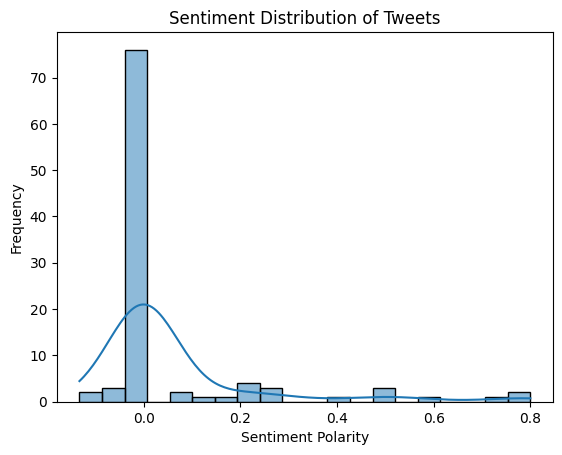

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.histplot(sentiments, bins=20, kde=True)
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [20]:
# Define categories
positive = 0
neutral = 0
negative = 0

# Go through each sentiment score
for score in sentiments:
    if score > 0:
        positive += 1
    elif score < 0:
        negative += 1
    else:
        neutral += 1

# Print the results
print(f"Positive tweets: {positive}")
print(f"Negative tweets: {negative}")
print(f"Neutral tweets: {neutral}")


Positive tweets: 19
Negative tweets: 7
Neutral tweets: 74


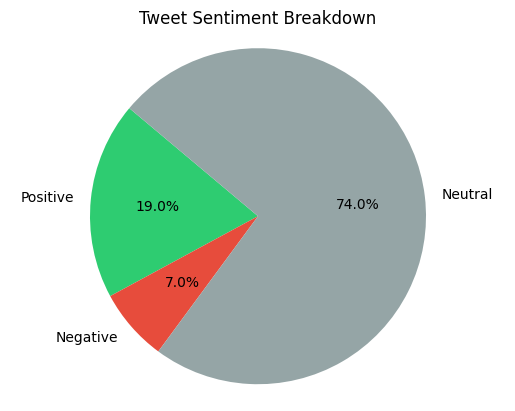

In [21]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
colors = ['#2ecc71', '#e74c3c', '#95a5a6']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tweet Sentiment Breakdown')
plt.axis('equal')  # Equal aspect ratio to make the pie chart circular
plt.show()
